## Systematic approach to Exploring a given data set 
I have used the popular titanic dataset to go through a series of sequential questions that you need to answer when exploring a new dataset 
1) How many rows and columns are there in the dataset?
2) Appropriate summaries of columns 
    1) Summary statistics of numerical values
    2) Frequency distribution of categorical values
    3) Find out the missing values and replace with the mean 
3) Univariate visualizations to know the distrbutions 
    1) Histograms and box plots for numeric columns
    2) Bar charts for categorical data
4) Bivariate analysis
    1) Correlation between 2 numeric variables
    2) Scatter plot between 2 numeric variables
5) Convert categorical into dummy variable taking value 1 and 0 
6) Converting numeric variables into categorical data types
    1) Using an advanced function which maps values into bins of desired ranges 
    
    

In [12]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np


In [13]:
# Read dataset from a URL (online), and store into a DataFrame
titanic = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/TitanicSurvival.csv')

In [14]:
# Show information about the dataset, including variable details
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


In [9]:
# Show a summary of the first 5 rows of the dataset
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


## First task for you is to get a comprehensive output of all the steps from 1 to 2 mentioned above for variables in the titanic dataset 
Which function did you use for each of the tasks ?

## Lets focus on missing values now 

In [19]:
# How many non-missing values in each column?
titanic['age'].isna().sum()

263

In [20]:
# How many missing values in each column? 
titanic.isnull()

,Unnamed: 0,survived,sex,age,passengerClass
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1304,False,False,False,False,False
1305,False,False,False,True,False
1306,False,False,False,False,False
1307,False,False,False,False,False


In [21]:
# Replace the missing with mean of age for non missing values,
# then show how many non-missing values in the 'age' variable
titanic['age'].fillna(titanic['age'].mean).count()

1309

In [22]:
# List all the possible unique values in the 'passengerClass' variable
titanic['passengerClass'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [23]:
# How many possible unique values in the 'passengerClass' variable?
titanic['passengerClass'].nunique()

3

In [24]:
# For each possible unique value in the 'passengerClass' variable,
# count how often that value occurs
titanic['passengerClass'].value_counts()

3rd    709
1st    323
2nd    277
Name: passengerClass, dtype: int64

## Secondly lets explore some  visualization functions using a special library called seaborn to work on steps 3 to 4 

In [25]:
# Import some libraries that allow us to perform visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='age', ylabel='Count'>

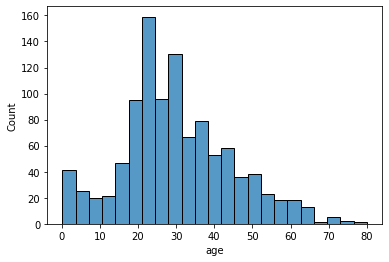

In [26]:
# Show historgram of 'age' variable after removing NA's
sns.histplot(titanic['age'].dropna())

<AxesSubplot:xlabel='age', ylabel='Density'>

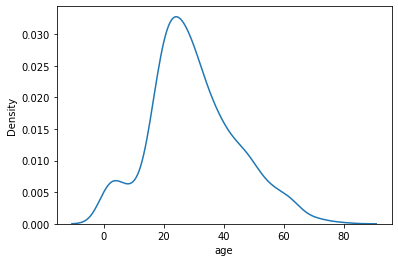

In [27]:
# Show density plot of 'age' variable.
# A density plot is like a histogram, but is used for continuous variables,
# so the y-axis does not measure count, but rather probability.
sns.kdeplot(titanic['age'])

<AxesSubplot:ylabel='age'>

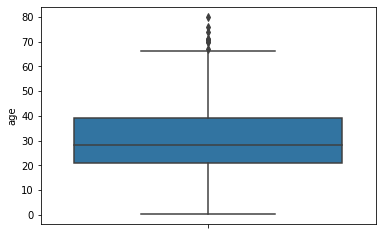

In [28]:
# Show boxplot for variable 'age'
sns.boxplot(y = titanic['age'])

In [29]:
# Show correlation between numeric varibles.
# There is only one numeric variable in the titanic dataset,
# so of course the correlation between the 'age' variable and itself is 1.
titanic.corr()

,age
age,1.0


In [30]:
# Read property dataset from CSV file
property = pd.read_csv('property.csv')
property

propertyDataset = pd.read_csv('property.csv')

In [31]:
# Show correlation between numeric variables
property.corr()

,financial_year,no_of_cases,median_annual_value,property_tax_collection
financial_year,1.000000,0.070673,0.086333,0.025257
no_of_cases,0.070673,1.000000,0.397860,0.906023
median_annual_value,0.086333,0.397860,1.000000,0.615492
property_tax_collection,0.025257,0.906023,0.615492,1.000000


<AxesSubplot:>

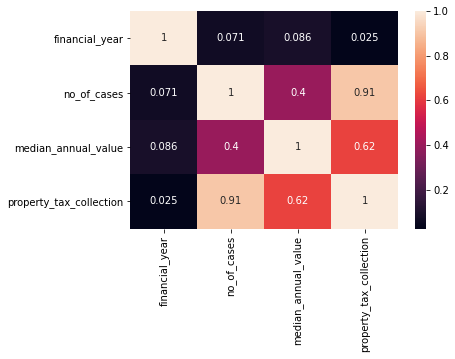

In [32]:
# Show correlation between variables as a heatmap instead
# (light colors means higher correlation,
# dark colors means lower correlation)
sns.heatmap(propertyDataset.corr(), annot=True)

## Try out some bivariate charts - sns.jointplot , sns.pairplot on the property file 


## Lets try to create new variable to address step 5 from EDA 
1) We will create a dummy variable which takes value 1 or 0 for the column names survived in the titanic dataset

#method1 involved writing a function and then applying it on the DF column 

In [33]:
# This function returns 1 if given parameter is 'yes', otherwise 0 is returnde
def dummy(charvalue):
    if charvalue == 'yes':
        y = 1
    else:
        y = 0
    return y

# Use the above function to create a new categorical variable 'numsurvived1' from the numeric variable 'survived'.
# Values 'yes' and 'no' will become 1 and 0 respectively.
titanic['numsurvived1'] = titanic['survived'].apply(dummy)
titanic

,Unnamed: 0,survived,sex,age,passengerClass,numsurvived1
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st,1
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st,1
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st,0
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st,0
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st,0
...,...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd,0
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd,0
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd,0
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd,0


In [34]:
# Show the frequency of each value of the 'numsurvived1' variable
titanic['numsurvived1'].value_counts()

0    809
1    500
Name: numsurvived1, dtype: int64

#method2 ( optional ) involves writing a lambda function

In [35]:
# This is another way to do it, using a lambda function
titanic['numsurvived2'] = titanic['survived'].apply(lambda x: 1 if x == 'yes' else 0)
titanic['numsurvived2'].value_counts()

0    809
1    500
Name: numsurvived2, dtype: int64

#method3 (optional ) involves list comprehension 

In [ ]:
# Yet another way using list comprehension
titanic['numsurvived3'] = [1 if x == 'yes' else 0 for x in titanic['survived']]
titanic['numsurvived3'].value_counts()

## Lets try to create new variable to address step 6 from EDA 
We will discretize the variable age into multiple categories identified by age bands 

1) What is descretization

2) ```pd.cut``` function

In [ ]:
# Create a new variable 'agebins' which will be categorical.
# We use the 'age' variable to create 16 bins.
titanic['agebins'] = pd.cut(titanic['age'], 16)
titanic

In [ ]:
# Same as above, but choose exactly where the bin boundaries are, and label each bin

#in agebins column ( = excluding ], = including. when 16 bin is declared, (highest value - lowest value) / 16

#bin parameter = 5, labels parameter = 4 because bin parameter only states the boundary, labels are the value in betweeen the bin's boundary
titanic['agebins2'] = pd.cut(titanic['age'], bins = [0,10,35,55,80], labels = ['children','young','adult','elderly'])
titanic

In [ ]:
# Show the frequency of each value of the 'agebins2' variable
titanic['agebins2'].value_counts()

In [ ]:
# Show minimum 'age' values for each category in 'agebins2' variable
titanic.groupby('agebins2')['age'].min()

In [ ]:
# Show maximum 'age' values for each category in 'agebins2' variable
titanic.groupby('agebins2')['age'].max()

In [ ]:
sns.countplot(titanic['agebins2'])